# PROJECT:Auto Insurance Claim

In [1]:
#Import the required Libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Lets read the csv file
df=pd.read_csv('Auto_Insurance_Claims_amount.csv')

In [3]:
#Lets check the shape of data
df.shape

(9134, 26)

In [4]:
#Lets check the first five rows of features
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [5]:
# Lets check the datatypes
df.dtypes 


Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [6]:
#Lets get more details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

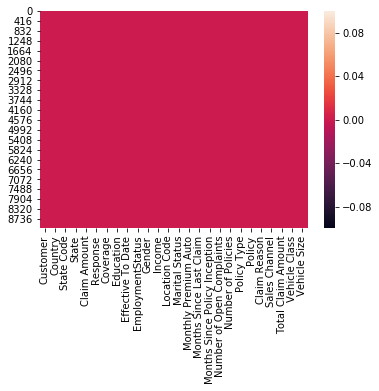

In [7]:
#lets checking the missing values Nan
sns.heatmap(df.isnull())
plt.show()


In [8]:
# Lets confirm about missing value once more
df.isnull().sum()
#Hence we are now sure there are no missing values

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [9]:
# Lets see the descriptive statistics of numerical attributes
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [10]:
#Lets see the correlation among the different features as well as with target
df.corr()
# we can  see there is  positive correlation of claim amount variable with several input features while negative correlation with one variable

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


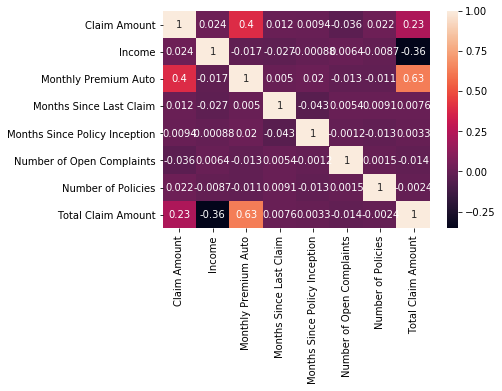

In [11]:
# lets visualize the correlation with heat map
sns.heatmap(df.corr(), annot = True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000EAE6F06208>,
      dtype=object)

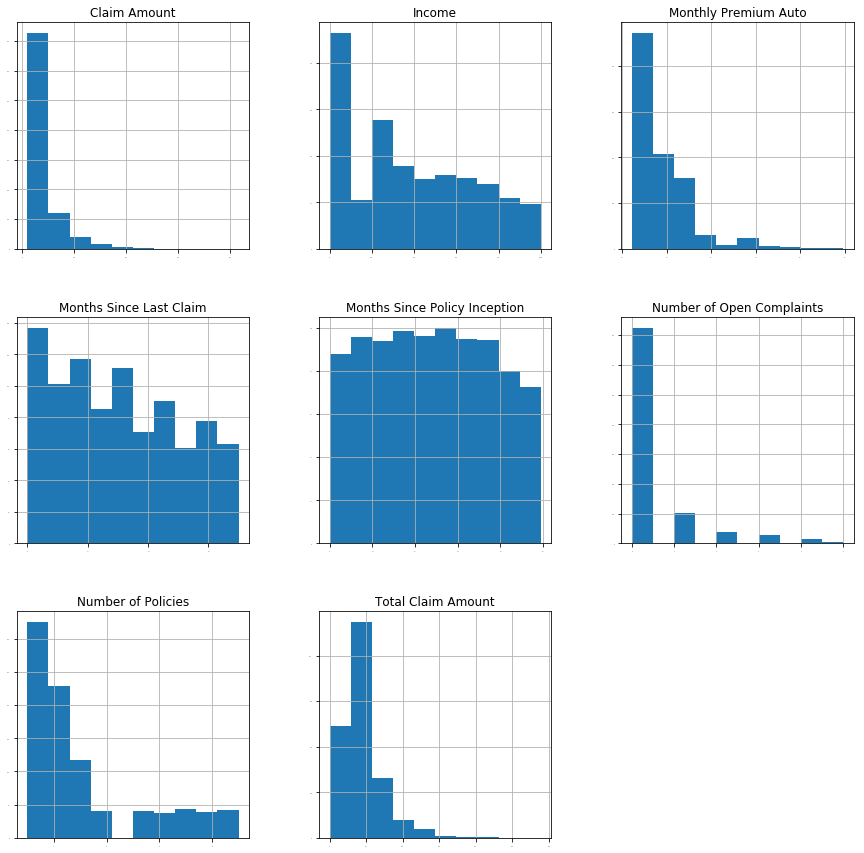

In [12]:
#Lets visualize distribution of numeric data
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,   figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000EAE88A1908>,
      dtype=object)

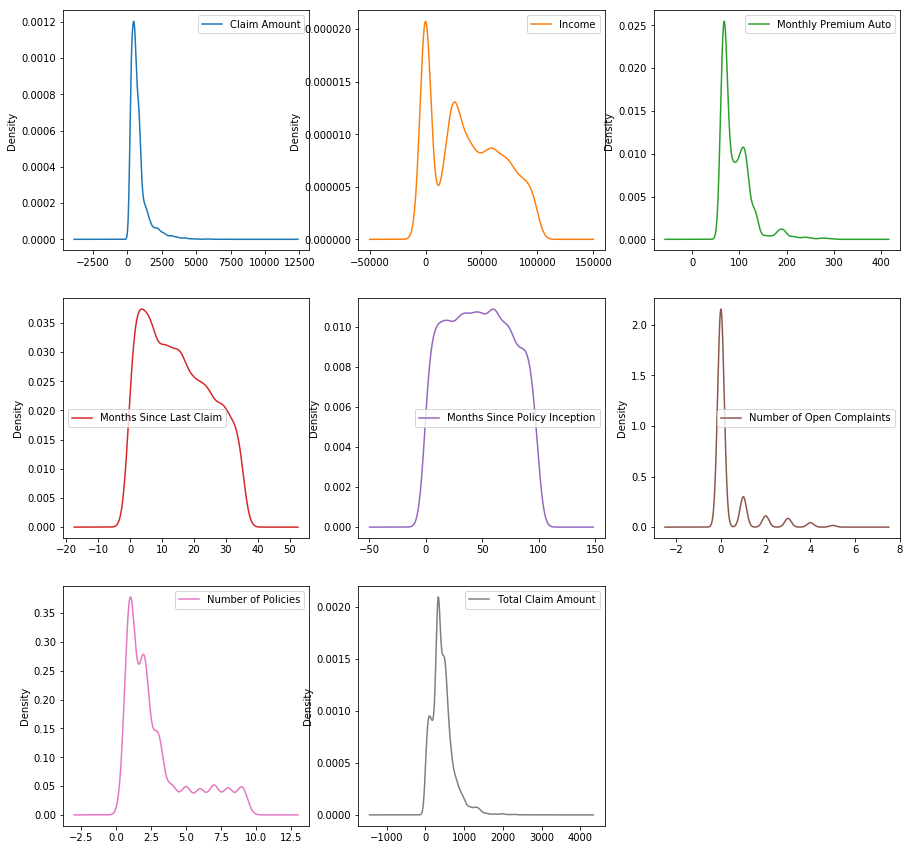

In [13]:
# # Univariate Density Plots of all numeric variables
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(15,15))

Claim Amount                        AxesSubplot(0.125,0.657941;0.227941x0.222059)
Income                           AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Monthly Premium Auto             AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Months Since Last Claim             AxesSubplot(0.125,0.391471;0.227941x0.222059)
Months Since Policy Inception    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Number of Open Complaints        AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Number of Policies                     AxesSubplot(0.125,0.125;0.227941x0.222059)
Total Claim Amount                  AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

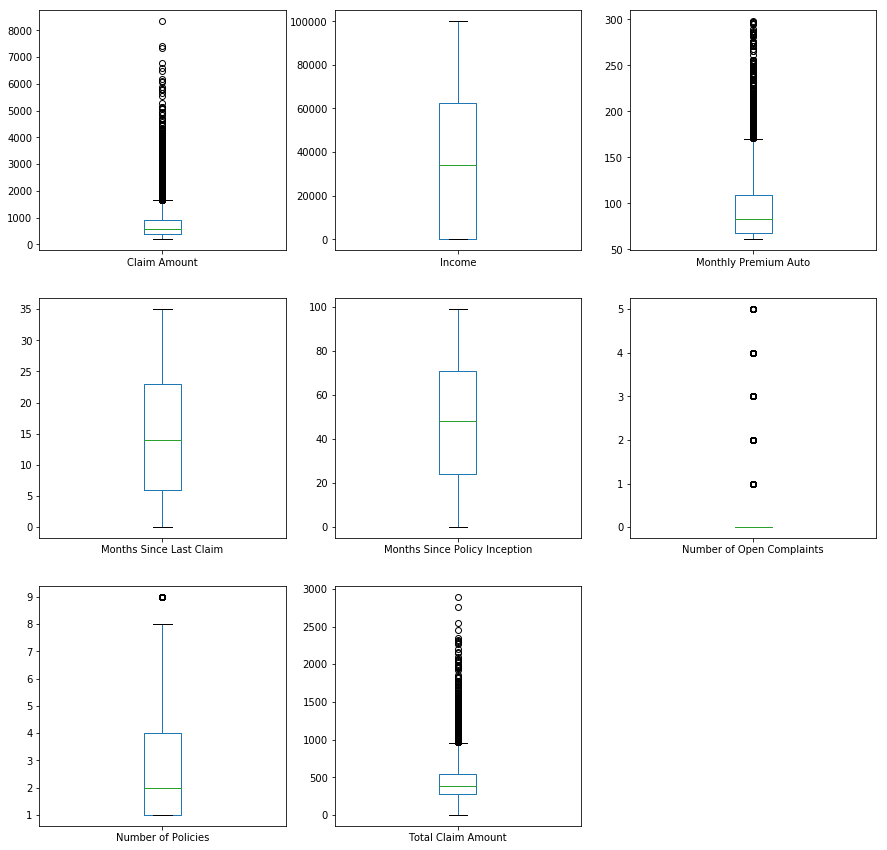

In [14]:
#Lets plot the box plot of each numeric variable
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
# we can see the  presence of outliers in few variables, we will deal with them soon

In [15]:
#Lets explore the customer variable
df['Customer'].nunique()

9134

In [16]:
#As the customer variable is unique for each entry lets drop it
df.drop('Customer',axis=1,inplace=True)

In [17]:
#lets explore Country variables
df['Country'].nunique()

1

In [18]:
#As only  ONE country is there in entire dataset, lets drop it
df.drop('Country',axis=1,inplace=True)

In [19]:
#Lets explore State code
df['State Code'].value_counts()

MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64

In [20]:
#Lets explore State
df['State'].value_counts()
#we will use dummy encoding for it

Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64

In [21]:
#As the  state code is just the coded version of state we can drop either of these
df.drop('State Code',axis=1,inplace=True)

In [22]:
#lets explore  the responce varibale
df['Response'].value_counts()
# we will use dummyencoding for it

No     7826
Yes    1308
Name: Response, dtype: int64

In [23]:
#Lets explore coverage
df['Coverage'].value_counts()
#there are just 3 options, we will use label encoding for it as there is particular order in them

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [24]:
#Lets explore Education
df['Education'].value_counts()
# we will use label encoding for it as there is an order for them

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [25]:
#Lets explore Employment status
df['EmploymentStatus'].value_counts()
# we will use dummy encoding for it

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [26]:
#Lets explore Gender variable
df['Gender'].value_counts()
#we will use dummy encoding for it

F    4658
M    4476
Name: Gender, dtype: int64

In [27]:
#Lets explore Location code
df['Location Code'].value_counts()
# we will use dummy encoding

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [28]:
#Lets explore Marital status
df['Marital Status'].value_counts()
# we will use dummy encoding

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

In [29]:
#Lets explore Policy Type
df['Policy Type'].value_counts()
#we will use dummy encoding for it

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

In [30]:
#Lets explore Policy 
df['Policy'].value_counts()
#we will use dummy encoding for it

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [31]:
#Lets explore 'Claim Reason' 
df['Claim Reason'].value_counts()
#we will use dummy encoding for it

Collision       3752
Hail            2926
Scratch/Dent    1432
Other           1024
Name: Claim Reason, dtype: int64

In [32]:
#Lets explore 'Sales Channel' 
df['Sales Channel'].value_counts()
#we will use dummy encoding for it


Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

In [33]:
#Lets explore 'Vehicle Class' 
df['Vehicle Class'].value_counts()
#we will use dummy encoding for it

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

In [34]:
#Lets explore 'Vehicle Size' 
df['Vehicle Size'].value_counts()
#we will use label encoding for it


Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

In [35]:
#Lets create a copy of the data
dft=df.copy()

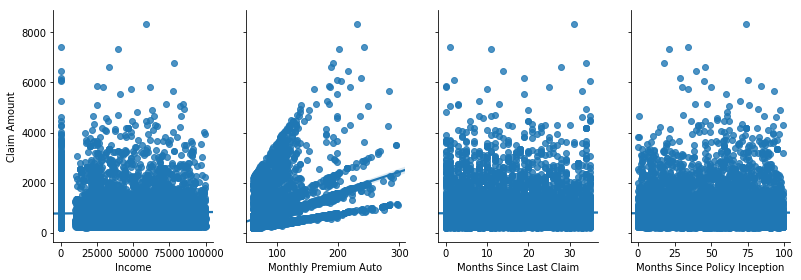

In [36]:
#Lets explore the relation of claim amount variable with OTHER NUMERIC DATA
sns.pairplot(dft, x_vars=['Income', 'Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception'], size=4, aspect=0.7, y_vars='Claim Amount',  kind='reg')

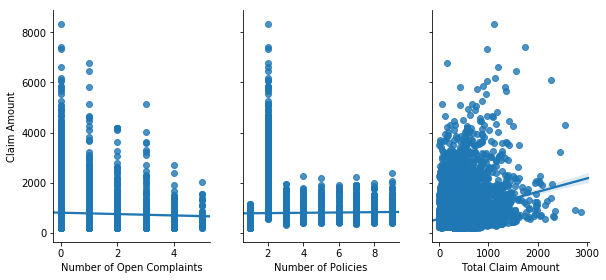

In [37]:
#Lets explore relation with remaining numeric data
sns.pairplot(dft, x_vars=['Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'], size=4, aspect=0.7, y_vars='Claim Amount',  kind='reg')

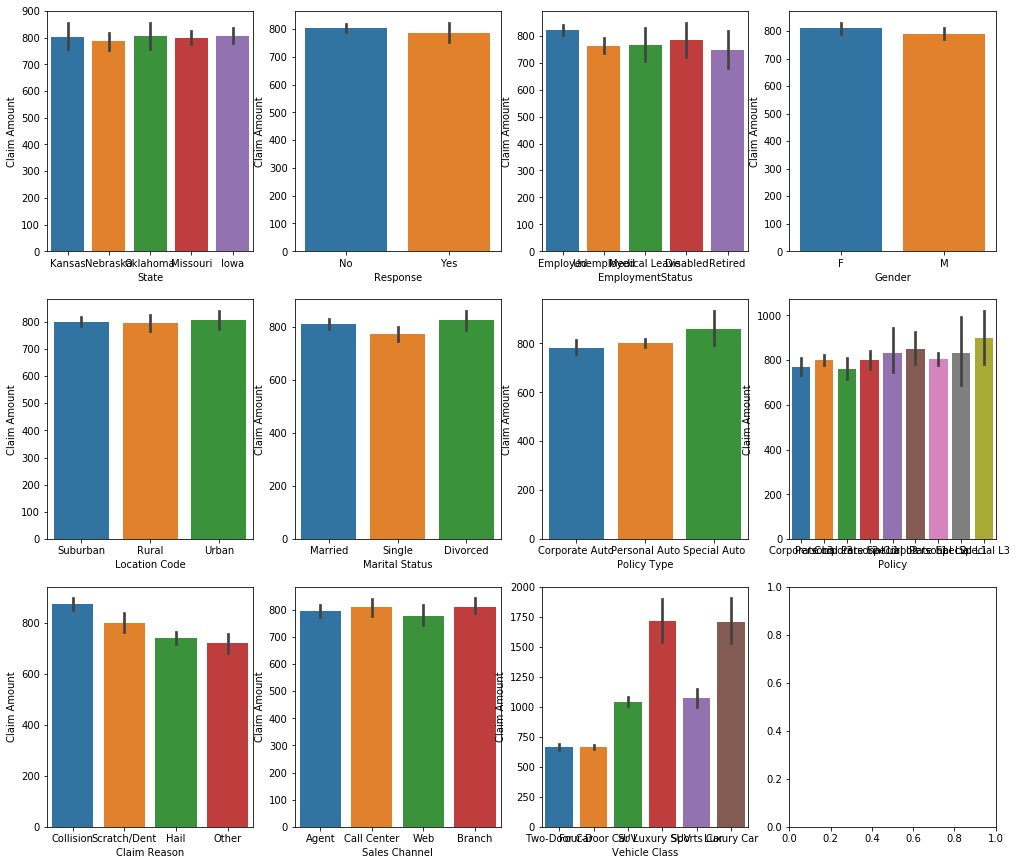

In [38]:
#Lets visualize relation of categorical paramters with respect to 'claim amount'
f,axes= plt.subplots(3,4, figsize=(17,15))
sns.barplot(x='State', y ='Claim Amount', data=dft,ax=axes[0,0])
sns.barplot(x='Response', y ='Claim Amount', data=dft, ax=axes[0,1])
sns.barplot(x='EmploymentStatus', y ='Claim Amount', data=dft, ax=axes[0,2])
sns.barplot(x='Gender', y ='Claim Amount', data=dft, ax=axes[0,3])
sns.barplot(x='Location Code', y ='Claim Amount', data=dft, ax=axes[1,0])
sns.barplot(x='Marital Status', y ='Claim Amount', data=dft, ax=axes[1,1])
sns.barplot(x='Policy Type', y ='Claim Amount', data=dft, ax=axes[1,2])
sns.barplot(x='Policy', y ='Claim Amount', data=dft, ax=axes[1,3])
sns.barplot(x='Claim Reason', y ='Claim Amount', data=dft, ax=axes[2,0])
sns.barplot(x='Sales Channel', y ='Claim Amount', data=dft, ax=axes[2,1])
sns.barplot(x='Vehicle Class', y ='Claim Amount', data=dft, ax=axes[2,2])

In [39]:
#Lets check the skeness in data
df.skew()

Claim Amount                     3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64

In [40]:
#Lets reduce the skewness
columns=['Claim Amount','Monthly Premium Auto','Number of Open Complaints','Number of Policies','Total Claim Amount']
for col in columns: 
    df[col]=np.log1p(df[col])

In [41]:
#Lets check the skeness in data again
df.skew()
#skewness has come down but  not what we wanted as initially it was high due to nature of data

Claim Amount                     0.578248
Income                           0.286887
Monthly Premium Auto             1.013663
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        1.999011
Number of Policies               0.657633
Total Claim Amount              -1.741369
dtype: float64

In [42]:
#Lets reduce negative skewness
df['Total Claim Amount']=np.power(df['Total Claim Amount'],2)

In [43]:
#Lets check the skewness again
df.skew()

Claim Amount                     0.578248
Income                           0.286887
Monthly Premium Auto             1.013663
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        1.999011
Number of Policies               0.657633
Total Claim Amount              -0.855795
dtype: float64

In [44]:
# Lets remove the outliers if any
from scipy.stats import zscore
colm=df[['Claim Amount','Monthly Premium Auto','Number of Open Complaints','Number of Policies','Total Claim Amount']]
z_score =abs(zscore(colm))
dfx = df.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', df.shape)
print('The shape of dataframe after removing outliers is =', dfx.shape)
# There were few outliers which have been removed

The shape of original dataframe was = (9134, 23)
The shape of dataframe after removing outliers is = (8692, 23)


In [46]:
#Lets create dummy variables
dfx=pd.get_dummies(dfx,columns=['Response','State','EmploymentStatus','Gender','Location Code','Marital Status','Policy Type','Policy','Claim Reason','Sales Channel','Vehicle Class'], drop_first=True)

In [47]:
#Lets assign encoding to 'Education','Coverage','Vehicle Size'
dfx['Education']=dfx['Education'].map({'High School or Below':0,'College':1,'Bachelor':2,'Master':3,'Doctor':4})
dfx['Coverage']=dfx['Coverage'].map({'Basic':0,'Extended':1,'Premium':2})
dfx['Vehicle Size']=dfx['Vehicle Size'].map({'Small':0,'Medsize':1,'Large':2})

In [48]:
#Let see first five rows of data again
dfx.head()

,Claim Amount,Coverage,Education,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,...,Claim Reason_Other,Claim Reason_Scratch/Dent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,5.625287,0,2,2/24/11,56274,4.248495,32,5,0.0,0.693147,...,0,0,0,0,0,0,0,0,0,1
1,6.549584,1,2,1/31/11,0,4.553877,13,42,0.0,2.197225,...,0,1,0,0,0,0,0,0,0,0
2,7.162198,2,2,2/19/11,48767,4.691348,18,38,0.0,1.098612,...,0,0,0,0,0,0,0,0,0,1
3,6.640642,0,2,1/20/11,0,4.672829,18,65,0.0,2.079442,...,0,0,0,1,0,0,0,1,0,0
4,5.643216,0,2,2/3/11,43836,4.304065,12,44,0.0,0.693147,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#Lets seperate date, month and day
dates=dfx['Effective To Date'].str.split('/',expand=True)
dates.head()

,0,1,2
0,2,24,11
1,1,31,11
2,2,19,11
3,1,20,11
4,2,3,11


In [50]:
#Lets create seperate column for each
dfx['Month']=dates[0].astype(int)
dfx['Day']=dates[1].astype(int)
dfx['Year']=dates[2].astype(int)


In [51]:
#Lets see the year colum
dfx['Year'].value_counts()


11    8692
Name: Year, dtype: int64

In [52]:
# As year is unique lets drop it
dfx.drop('Year', axis=1,inplace=True)

In [53]:
#Lets drop Effective to date column
dfx.drop('Effective To Date',axis=1,inplace=True)

In [54]:
# Let us seperate the features and Target
x=dfx.drop(['Claim Amount'],axis=1)    
y=dfx[['Claim Amount']]

In [55]:
#Lets check first five rows of x
x.head()


,Coverage,Education,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Vehicle Size,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Month,Day
0,0,2,56274,4.248495,32,5,0.0,0.693147,35.466170,1,...,0,0,0,0,0,0,0,1,2,24
1,1,2,0,4.553877,13,42,0.0,2.197225,49.451160,1,...,0,0,0,0,0,0,0,0,1,31
2,2,2,48767,4.691348,18,38,0.0,1.098612,40.210714,1,...,0,0,0,0,0,0,0,1,2,19
3,0,2,0,4.672829,18,65,0.0,2.079442,39.369834,1,...,0,1,0,0,0,1,0,0,1,20
4,0,2,43836,4.304065,12,44,0.0,0.693147,24.358322,1,...,0,0,0,0,0,0,0,0,2,3


In [56]:
#lets see first 5 rows of y
y.head()

,Claim Amount
0,5.625287
1,6.549584
2,7.162198
3,6.640642
4,5.643216


In [57]:
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [58]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Lasso', Pipeline([('Scaler', StandardScaler()),('Lasso',Lasso(random_state=5))])))
pipelines.append(('Ridge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge(random_state=5))])))
pipelines.append(('EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet(random_state=5))])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor(random_state=5))])))
pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))

In [59]:
#Let us check which model will perform well on the given data on the basis of mean crossval score(neg_mean_squared_error) and its std dev
results1 = []
names1 = []
for name, model in pipelines: 
    kfold1 = KFold(n_splits=10, random_state=1) 
    cv_results1 = cross_val_score(model, x, y, cv=kfold1, scoring='neg_mean_squared_error') 
    results1.append(cv_results1.mean()) 
    names1.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg)

LR: -0.285307 (0.017920)
Lasso: -0.404806 (0.022357)
Ridge: -0.285294 (0.017915)
EN: -0.404806 (0.022357)
DT: -0.074690 (0.008194)
SVR: -0.199021 (0.012858)
KNN: -0.336590 (0.015946)


In [60]:
#Let us check which model will perform well on the given data on the basis of mean crossval r2score and its std dev
results = []
names = []
for name, model in pipelines: 
    kfold = KFold(n_splits=10, random_state=1) 
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='r2') 
    results.append(cv_results.mean()) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.294630 (0.021752)
Lasso: -0.000828 (0.000892)
Ridge: 0.294661 (0.021762)
EN: -0.000828 (0.000892)
DT: 0.814850 (0.021742)
SVR: 0.507815 (0.020061)
KNN: 0.167066 (0.027917)


In [61]:
#lETS SEE THE COMPARISON OF ALL BASIC ALGORITHMS 
Comparison = pd.DataFrame({'ModelName':names,'R2_score': results,'NMSE':results1})
Comparison.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
4,DT,0.814850,-0.074690
5,SVR,0.507815,-0.199021
2,Ridge,0.294661,-0.285294
0,LR,0.294630,-0.285307
6,KNN,0.167066,-0.336590
1,Lasso,-0.000828,-0.404806
3,EN,-0.000828,-0.404806


In [62]:
#Lets see if ensemble technique can perform better
#lETS CREATE PIPLELINE FOR ENSEMBLE TECHNIQUE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
pipelines1 = []
pipelines1.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(random_state=5))])))
pipelines1.append(('ADC', Pipeline([('Scaler', StandardScaler()),('ADC', AdaBoostRegressor(random_state=5))])))
pipelines1.append(('GBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingRegressor(random_state=5))])))

In [63]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters can perform better in terms of NMSE

results2 = []
names2 = []
for name, model in pipelines1: 
    kfold2 = KFold(n_splits=10, random_state=1) 
    cv_results2 = cross_val_score(model, x, y, cv=kfold2, scoring='neg_mean_squared_error') 
    results2.append(cv_results2.mean()) 
    names2.append(name) 
    msg2 = "%s: %f (%f)" % (name, cv_results2.mean(), cv_results2.std())
    print(msg2)

RF: -0.039182 (0.004420)
ADC: -0.055037 (0.003566)
GBC: -0.039022 (0.004067)


In [64]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters can perform better in terms of r2 score
results3 = []
names3 = []
for name, model in pipelines1: 
    kfold3 = KFold(n_splits=10, random_state=1) 
    cv_results3 = cross_val_score(model, x, y, cv=kfold3, scoring='r2') 
    results3.append(cv_results3.mean()) 
    names3.append(name) 
    msg3 = "%s: %f (%f)" % (name, cv_results3.mean(), cv_results3.std())
    print(msg3) 

RF: 0.903150 (0.009099)
ADC: 0.863781 (0.007656)
GBC: 0.903681 (0.006457)


In [65]:
#lETS SEE THE COMPARISON SUMMARY OF ENSEMBLE TECHNIQUES
Comparison2 = pd.DataFrame({'ModelName':names2,'R2_score': results3,'NMSE':results2})
Comparison2.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
2,GBC,0.903681,-0.039022
0,RF,0.903150,-0.039182
1,ADC,0.863781,-0.055037


In [66]:
#lETS SEE THE COMPARISON OF ALL ALGORITHMS USED INCLUDING BASIC AND ENSEMBLE
final_comparison =pd.concat([Comparison,Comparison2])
final_comparison.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
2,GBC,0.903681,-0.039022
0,RF,0.903150,-0.039182
1,ADC,0.863781,-0.055037
4,DT,0.814850,-0.074690
5,SVR,0.507815,-0.199021
2,Ridge,0.294661,-0.285294
0,LR,0.294630,-0.285307
6,KNN,0.167066,-0.336590
1,Lasso,-0.000828,-0.404806
3,EN,-0.000828,-0.404806


In [68]:
# WE CAN SEE THAT AMONG ALL ALGORITHMS GBR  IS PERFORMING BEST AND EVEN RF IS VERY CLOSE
#LETS TRY TO SEE IF ITS PERFORMANCE CAN BE IMPROVED BY TUNING ITS PARAMETERS

In [69]:
#Lets create kfold
kfoldx = KFold(n_splits=10, random_state=1)

In [70]:
#Lets try to use GRIDSEARCH ON  GRADIENT BOOSTING REGRESSOR
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(x)
scX = scaler.transform(x)

param_grid = {'n_estimators': [50,100,200,300],'learning_rate': [0.05,0.1,0.2],'max_depth': [2,3,4]}
mod = GradientBoostingRegressor(random_state=5)
grid = GridSearchCV(estimator=mod, param_grid=param_grid, scoring='r2', cv=kfoldx,n_jobs=-1,verbose=True)
grid_result = grid.fit(scX, y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 12.2min finished


In [72]:
#Lets check the best mean score
grid_result.best_score_
# we can see there is very small improvement in performance
#r2 score improved from 0.903681 to 0.908720

0.9087204863331237

In [73]:
#Lets check the best parameters
grid_result.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}

In [75]:
#lETS CHECK AT WHICH RANDOM STATE WE WILL GET MAXIMUM R2 SCORE USING BEST PARAMETERS
#Lets find out the best random state for selected GBR in terms of minimum mse 

max_r2=0
gb= GradientBoostingRegressor(random_state=5,learning_rate=0.1,max_depth=4,n_estimators=300)
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    # It is always better to scale the data after train test split to avoid leakge of information into test portion
    ss = StandardScaler()
    X_train= ss.fit_transform(X_train)
    X_test= ss.transform(X_test)
    gb.fit(X_train,y_train)
    ypreds=gb.predict(X_test)
    r2_sc=r2_score(y_test, ypreds)
    print('At random state ', i, 'the value of r2 is ', r2_sc)
    if r2_sc>max_r2:
        max_r2=r2_sc
        finalstate=i
print()
print()
print('max r2 score is', max_r2,'at random state' , finalstate)


At random state  1 the value of r2 is  0.9092032773733104
At random state  2 the value of r2 is  0.9036864943720994
At random state  3 the value of r2 is  0.905903094612962
At random state  4 the value of r2 is  0.9111173514446207
At random state  5 the value of r2 is  0.9025271450743648
At random state  6 the value of r2 is  0.9017683028850757
At random state  7 the value of r2 is  0.9066340890566744
At random state  8 the value of r2 is  0.9039047657565724
At random state  9 the value of r2 is  0.9011087022515041
At random state  10 the value of r2 is  0.9035392066308503
At random state  11 the value of r2 is  0.8975233829205348
At random state  12 the value of r2 is  0.9136162265282405
At random state  13 the value of r2 is  0.9021265097235953
At random state  14 the value of r2 is  0.9100843674939324
At random state  15 the value of r2 is  0.9098963126978715
At random state  16 the value of r2 is  0.9089501172537378
At random state  17 the value of r2 is  0.9086952281380031
At rand

In [76]:
#Lets implement the model using best selected random state
GBR= GradientBoostingRegressor(random_state=5,learning_rate=0.1,max_depth=4,n_estimators=300)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=30)
# It is always better to scale the data after train test split to avoid leakge of information into test portion
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)
GBR.fit(X_train,y_train)
ypred=GBR.predict(X_test)
mse=mean_squared_error(y_test, ypred)
mae=mean_absolute_error(y_test, ypred)
rmse =np.sqrt(mse)
r2score= r2_score(y_test, ypred)
print('The value of r2score is ', r2score)
print('The value of mse is ', mse)
print('The value of mae is ', mae)
print('The value of rmse is ', rmse)


The value of r2score is  0.9177674234528479
The value of mse is  0.033670489050157695
The value of mae is  0.09791234299100886
The value of rmse is  0.18349520170881226


In [77]:
# lETS CHECK ITS KFOLD CROSS VAL NMSE AND R2 SCORE
modelf = GradientBoostingRegressor(random_state=5,learning_rate=0.1,max_depth=4,n_estimators=300)
print('KFOLD Cross val nmse = ',cross_val_score(modelf,scX,y,cv=kfoldx,scoring="neg_mean_squared_error").mean())
print('KFOLD Cross val R2 = ',cross_val_score(modelf,scX,y,cv=kfoldx,scoring="r2").mean())

KFOLD Cross val nmse =  -0.03698528411193858
KFOLD Cross val R2 =  0.9087210492540235


In [78]:
# WE CAN SEE THAT MODEL IS PERFORMING FARELY WELL 
# WE HAVE KFOLD CROSS VAL R2=0.9087 AND TEST R2 SCORE =0.917



In [79]:
#As we have taken the log1p of claim colum to reduce skewness, we have to reverse the operation to get actual predicted values
ypredx=np.expm1(ypred)

In [83]:
# Lets save the predicted result to a csv file

dfP = pd.DataFrame(ypredx,columns=['Predicted'])
dfP.to_csv('GBR_CLAIM_prediction.csv')

In [84]:
# Lets dump our model into pkl file
from sklearn.externals import joblib
joblib.dump(GBR,'GBR_CLAIM_PRED.pkl')

['GBR_CLAIM_PRED.pkl']